In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

c:\Users\vionh\workspace\Data Analysis\data_analytics\Week_04


In [4]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['type',
                                                        'id',
                                                        'lat',
                                                        'lon',
                                                        'brand',
                                                        'shop',
                                                        'addr:city', 
                                                        'addr:housenumber', 
                                                        'addr:postcode', 
                                                        'geometry', 
                                                        'index_right',
                                                        'bfs_name',
                                                        'bfs_number',
                                                        'pop',
                                                        'pop_dens',
                                                        'frg_pct',
                                                        'emp']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


In [7]:
brand_counts = df_orig['brand'].value_counts()
print(brand_counts)


Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: brand, dtype: int64


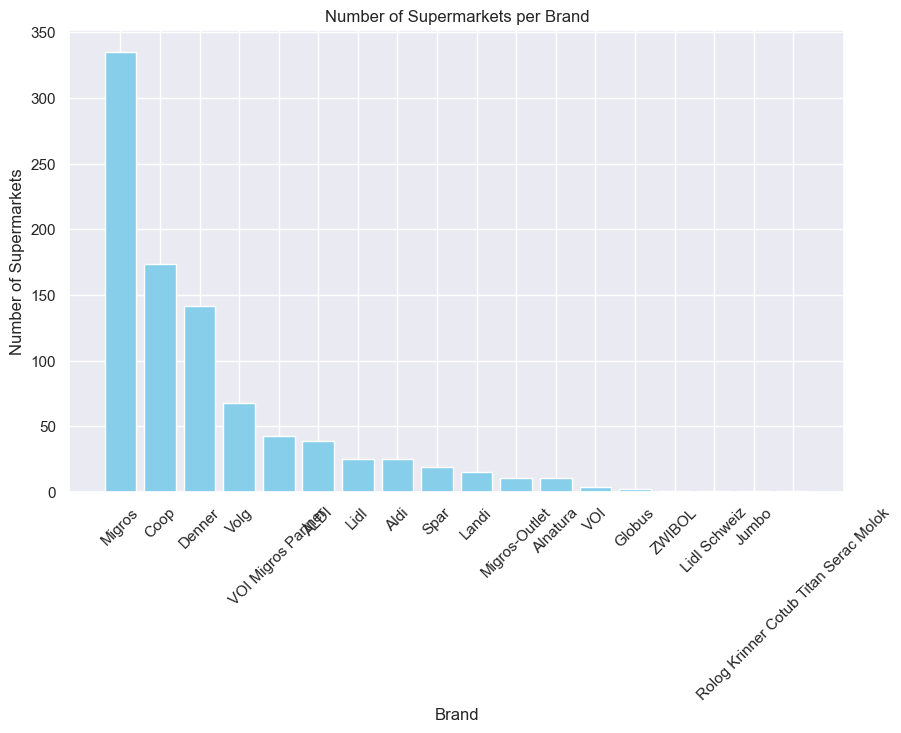

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values, color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Number of Supermarkets')
plt.title('Number of Supermarkets per Brand')
plt.xticks(rotation=45)
plt.show()

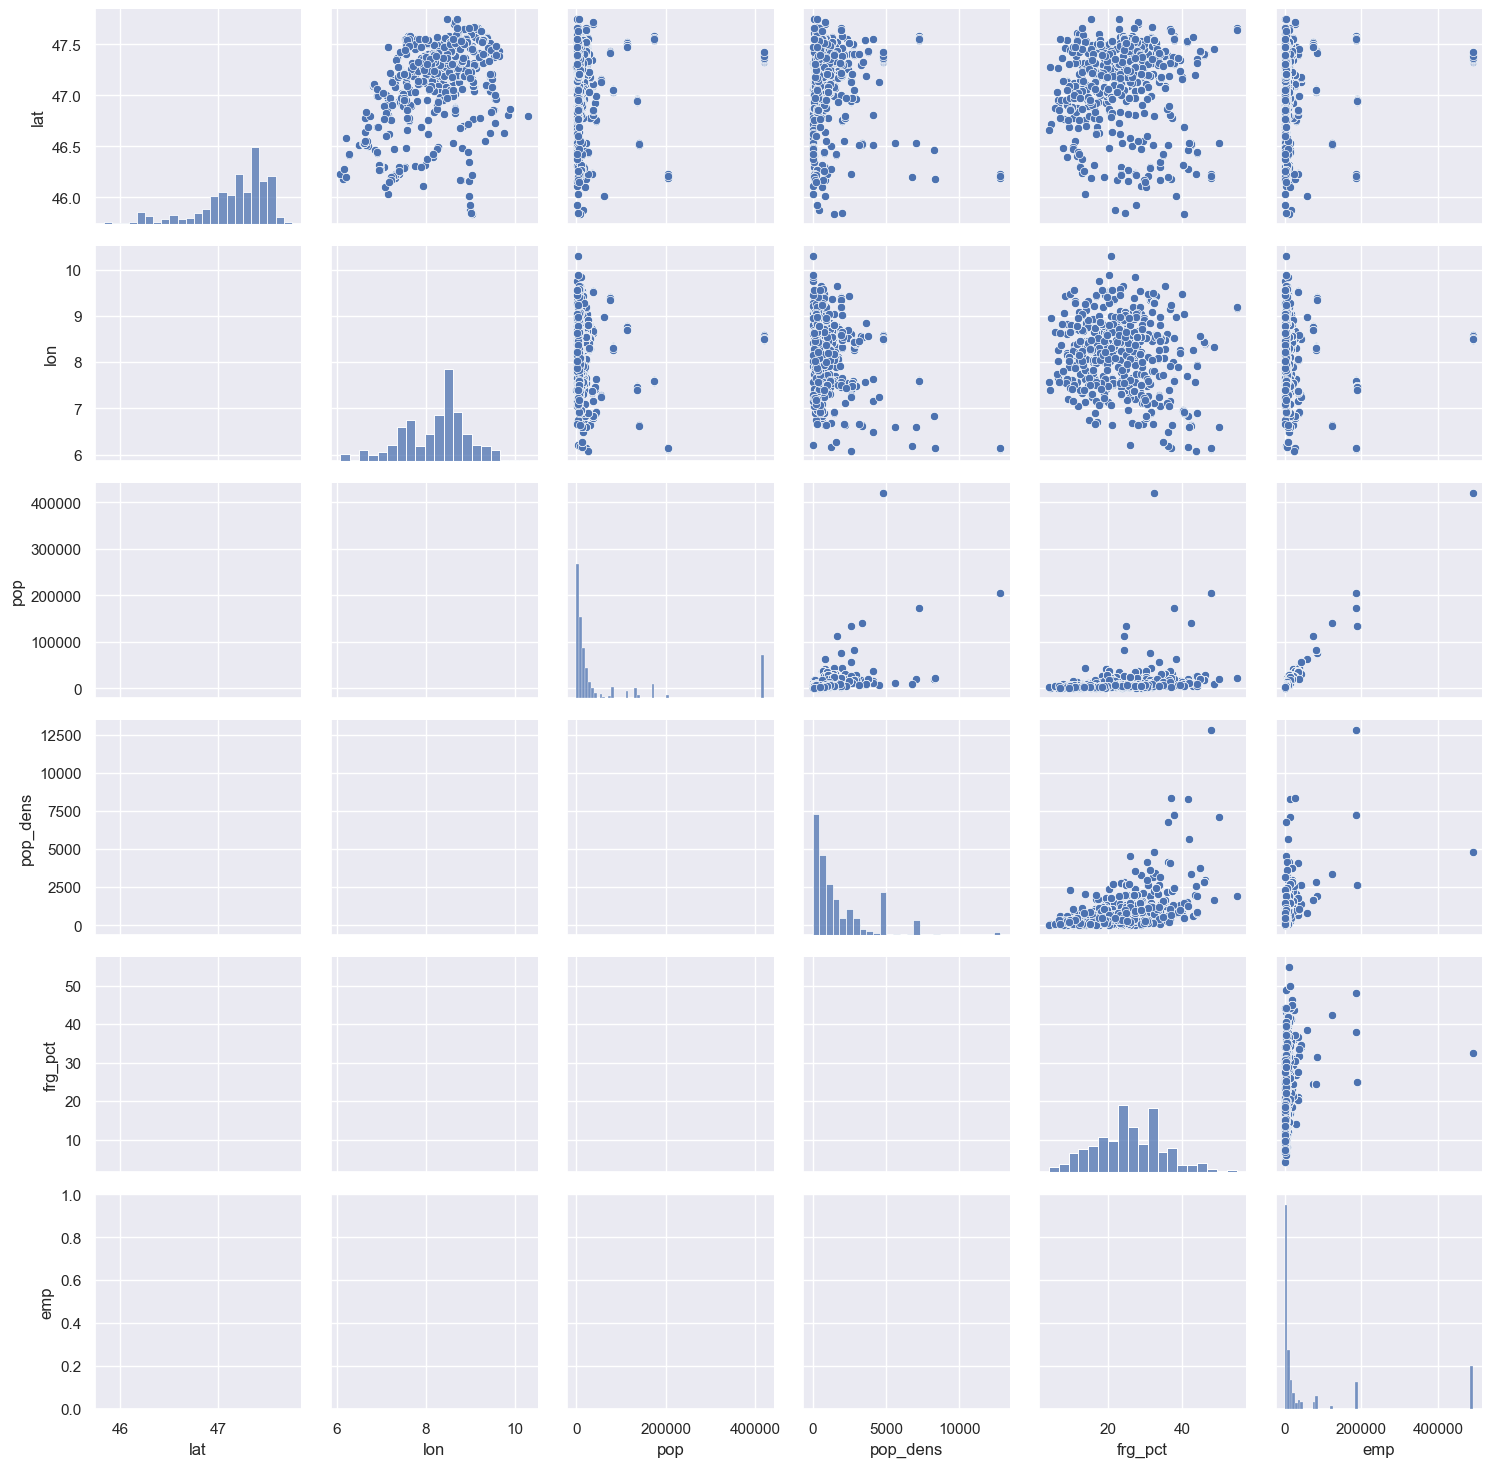

In [11]:
numeric_vars = ['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']

# Create a PairGrid
g = sns.PairGrid(df_orig[numeric_vars])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})

plt.show()

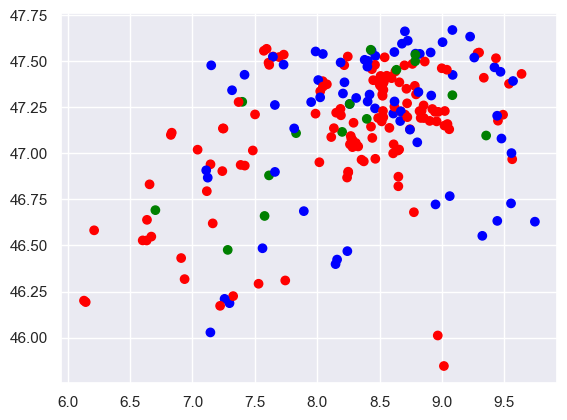

In [12]:
df_sub = df_orig.loc[df_orig['brand'].isin(['Denner','Volg','Landi'])]
df_sub

colors = {'Denner':'red','Volg':'blue','Landi':'green'}

plt.scatter(df_sub['lon'],
            df_sub['lat'],
            c=df_sub['brand'].map(colors))